In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv('teleco_time_series .csv', index_col=0)
df = df[1:]
df.head(), df.describe()

(      Revenue
 Day          
 2    0.000793
 3    0.825542
 4    0.320332
 5    1.082554
 6    0.107654,
           Revenue
 count  730.000000
 mean     9.836357
 std      3.838059
 min      0.000793
 25%      6.905127
 50%     10.794862
 75%     12.567476
 max     18.154769)

Text(0, 0.5, 'Revenue')

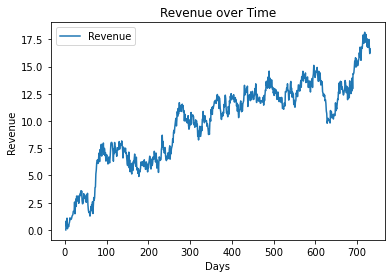

In [171]:
#plotting initial model
df.plot()
plt.title("Revenue over Time")
plt.xlabel("Days")
plt.ylabel("Revenue")

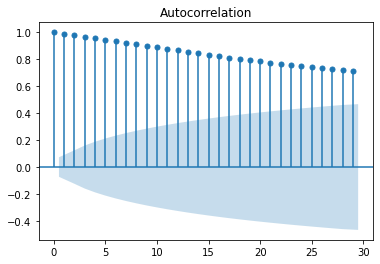

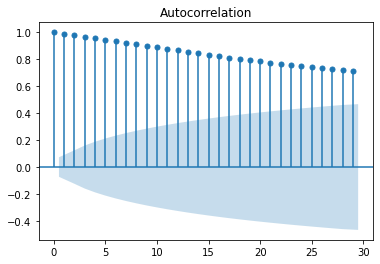

In [172]:
#plotting ACF of non stationary model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)

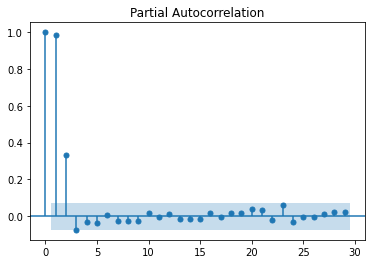

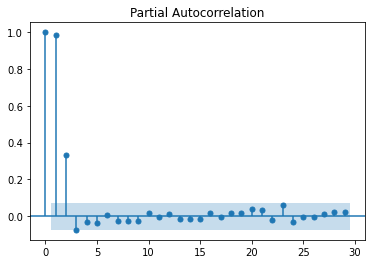

In [173]:
#plotting PACF of non stationary model
plot_pacf(df)

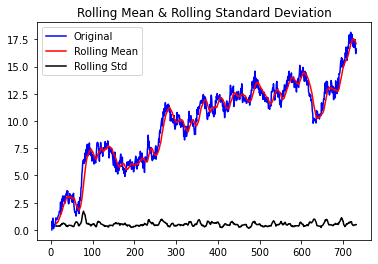

In [174]:
#Plotting Rolling Mean & Standard Deviation = Not Stationary
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [175]:
#using ad fuller to show our model isn't stationary 
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Revenue'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.7746383121968736
p-value: 0.39312375950297207
Critical Values:
	1%: -3.4393644334758475
	5%: -2.8655182850048306
	10%: -2.568888486973192


In [176]:
#converting to stationary via subtracting previous value
df_diff = df.diff(periods=10)
df_diff = df_diff[10:]
df_diff

,Revenue
Day,
12,1.110793
13,0.135361
14,0.643681
15,-0.102822
16,0.977893
...,...
727,-1.017275
728,-0.664103
729,-0.965179


<AxesSubplot:xlabel='Day'>

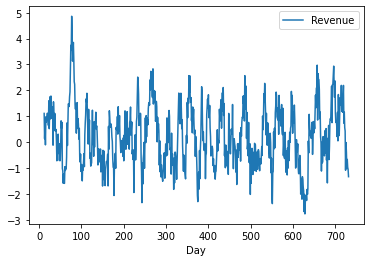

In [131]:
#stationary plot
df_diff.plot()

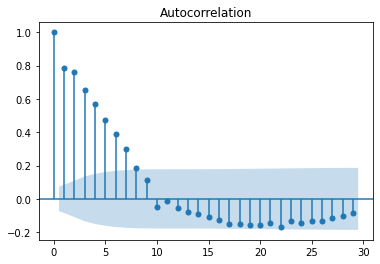

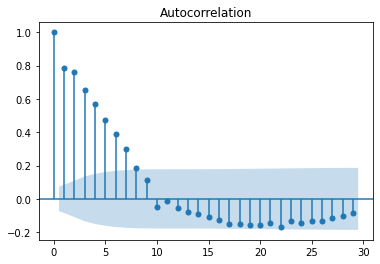

In [132]:
#plotting stationary 

plot_acf(df_diff['Revenue'])

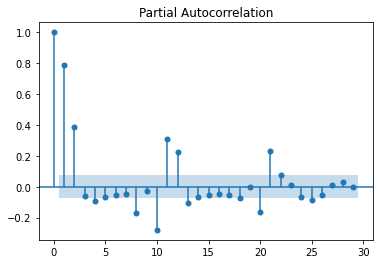

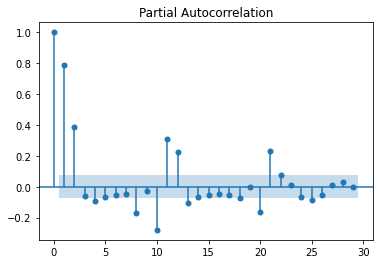

In [133]:
plot_pacf(df_diff['Revenue'])

In [134]:
#converting our data to stationary via logarithim
df_log = np.log(df[10:])
df_log

,Revenue
Day,
12,0.105788
13,-0.039882
14,-0.036650
15,-0.020476
16,0.082084
...,...
727,2.829179
728,2.861667
729,2.821595


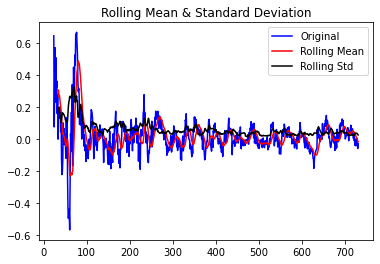

ADF Statistic: -4.592765103990658
p-value: 0.0001331944700668275
Critical Values:
	1%: -3.439503230053971
	5%: -2.8655794463678346
	10%: -2.5689210707289982


In [135]:
#plotting rolling mean and standard deviation for stationary model
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(df_log['Revenue'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

In [136]:
#Analyzing our new stationary model via adfuller
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_log)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.592765103990658
p-value: 0.0001331944700668275
Critical Values:
	1%: -3.439503230053971
	5%: -2.8655794463678346
	10%: -2.5689210707289982


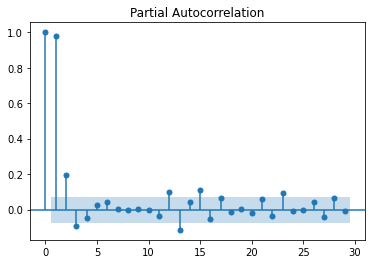

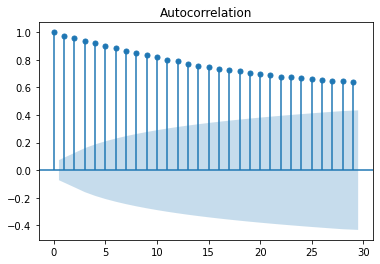

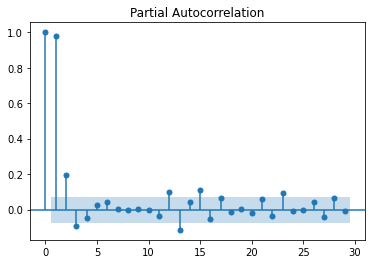

In [137]:
plot_acf(df_log['Revenue'])
plot_pacf(df_log['Revenue'])

In [138]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [139]:
stepwise_fit=auto_arima(df_log['Revenue'],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1678.967, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1522.404, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1673.341, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1637.264, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1522.954, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1680.892, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1682.588, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1680.921, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1671.864, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1679.026, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1682.016, Time=0.05 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.223 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 845.294
Date:                Sat, 07 Aug 2021   AIC                          -1682.588
Time:                        18:07:16   BIC                          -1664.277
Sample:                             0   HQIC                         -1675.519
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0038      0.002      1.591      0.112      -0.001       0.008
ma.L1         -0.4246      0.019    -22.838      0.000      -0.461      -0.388
ma.L2          0.2643      0.019     13.654      0.000       0.226       0.302
sigma2         0.0056      0.000     42.673      0.000       0.005       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2409.23
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
#setting up test train split
from statsmodels.tsa.arima_model import ARIMA
train = df_log[0:500]
test = df_log[500:731]
model = ARIMA(train['Revenue'],order=(0,1,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Revenue   No. Observations:                  499
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 514.934
Method:                       css-mle   S.D. of innovations              0.086
Date:                Sat, 07 Aug 2021   AIC                          -1021.868
Time:                        18:07:16   BIC                          -1005.018
Sample:                             1   HQIC                         -1015.256
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0049      0.003      1.493      0.135      -0.002       0.011
ma.L1.D.Revenue    -0.4257      0.043     -9.973      0.000      -0.509      -0.342
ma.L2.D.Revenue     0.2723      0.045      6.060      0.000       0.184       0.360
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.7818           -1.7498j            1.9165           -0.1831
MA.2            0.7818           +1.7498j            1.9165            0.1831
-----------------------------------------------------------------------------
"""

In [141]:
auto_arima(df['Revenue'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.109
Date:                Sat, 07 Aug 2021   AIC                            982.218
Time:                        18:07:18   BIC                            995.993
Sample:                             0   HQIC                           987.533
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0327      0.018      1.865      0.062      -0.002       0.067
ar.L1         -0.4706      0.033    -14.329      0.000      -0.535      -0.406
sigma2         0.2233      0.013     17.771      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.93   Prob(JB):                         0.35
Heteroskedasticity (H):               1.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
from statsmodels.tsa.statespace.tools import diff

In [143]:
df['Rev_2'] = diff(df['Revenue'],k_diff=1)

In [144]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [145]:
adf_test(df['Revenue'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.774638
p-value                   0.393124
# lags used               1.000000
# observations          728.000000
critical value (1%)      -3.439364
critical value (5%)      -2.865518
critical value (10%)     -2.568888
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [146]:
auto_arima(df['Revenue'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.109
Date:                Sat, 07 Aug 2021   AIC                            982.218
Time:                        18:07:21   BIC                            995.993
Sample:                             0   HQIC                           987.533
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0327      0.018      1.865      0.062      -0.002       0.067
ar.L1         -0.4706      0.033    -14.329      0.000      -0.535      -0.406
sigma2         0.2233      0.013     17.771      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.93   Prob(JB):                         0.35
Heteroskedasticity (H):               1.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['Revenue'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df['d1'],'Sales')

Augmented Dickey-Fuller Test: Sales
ADF test statistic      -44.927782
p-value                   0.000000
# lags used               0.000000
# observations          728.000000
critical value (1%)      -3.439364
critical value (5%)      -2.865518
critical value (10%)     -2.568888
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


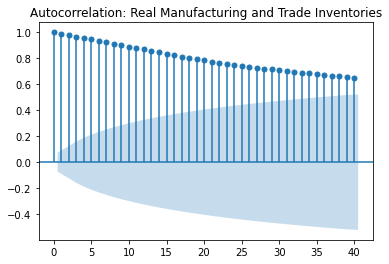

In [148]:
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(df['Revenue'],title=title,lags=lags);

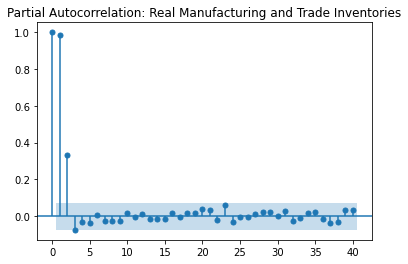

In [149]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(df['Revenue'],title=title,lags=lags);

In [150]:
stepwise_fit = auto_arima(df['Revenue'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.229, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=982.218, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1018.745, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1161.549, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=984.197, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=984.200, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=985.132, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=983.702, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.804 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.109
Date:                Sat, 07 Aug 2021   AIC                            982.218
Time:                        18:07:27   BIC                            995.993
Sample:                             0   HQIC                           987.533
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0327      0.018      1.865      0.062      -0.002       0.067
ar.L1         -0.4706      0.033    -14.329      0.000      -0.535      -0.406
sigma2         0.2233      0.013     17.771      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.93   Prob(JB):                         0.35
Heteroskedasticity (H):               1.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
len(df)
# Set one year for testing
train = df['Revenue'][:600]
train = df['Revenue'][600:731]

In [179]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,0) Predictions')

In [180]:
predictions

Day
132    7.774430
133    7.646615
134    7.842274
135    7.914655
136    7.874784
         ...   
257    7.562518
258    7.720228
259    8.121153
260    8.221831
261    8.568396
Name: ARIMA(1,1,0) Predictions, Length: 130, dtype: float64

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')